# Mover Dirichelt Analysis - allowing for need movement

Note that the interactive plots require the jupyter widgets extension for jupyter lab to be installed. This can currently not be managed in a conda env but can be installed using  
`jupyter labextension install @jupyter-widgets/jupyterlab-manager`

Call `help(hm.chart_name)` for information on arguments etc. for each charting function.


In [1]:
import sys
import os
home = os.path.expanduser('~')
sys.path.append(home + '/mc/witan.send.analysis/inference_analysis/')

import heatmaps as hm
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import seaborn as sns
from os import path
import numpy as np

%matplotlib inline

In [2]:
base_dir = home + "/mc/witan.send/data/demo/"

data_dir = base_dir + "data/"
transitions_csv = data_dir + "/transitions.csv"

results_dir = base_dir + "results/" 
results_for_checking_dir = base_dir + "results_for_checking/"

# Model Parameters

In [3]:
ipd.Code(filename=results_for_checking_dir + "runtime-metadata.edn",language='clojure')

{:execution
 {:start {:date "2019-03-15", :time "11:31:02"},
  :end {:date "2019-03-15", :time "11:32:05"}},
 :environment-metadata
 {:model-version "1.7.0",
  :os-name "Linux",
  :os-version "4.18.0-16-generic",
  :clj-version "1.9.0",
  :jvm-version "25.201-b09",
  :git-branch "tdf/joiner-unobserved-ay",
  :git-commit-id "8456d9e",
  :git-url
  "https://github.com/MastodonC/witan.send/commit/8456d9ecabdda451526807f585d0f8ca160adf55"},
 :file-inputs-md5s
 {:transitions "6b1468a38742f54ccb61bccf820dd5df",
  :population "f19179ab601db8325def8a5738d8fe71",
  :costs "396beeefe2c6eeb9aa31b7259bfaac65",
  :valid-states "7f63d89714fd9e6ac3dd71b118589c07"}}

In [4]:
ipd.Code(filename=results_dir + "runtime-metadata.edn",language='clojure')

{:execution
 {:start {:date "2019-03-18", :time "12:05:03"},
  :end {:date "2019-03-18", :time "12:29:59"}},
 :environment-metadata
 {:model-version "1.7.0",
  :os-name "Linux",
  :os-version "4.18.0-16-generic",
  :clj-version "1.9.0",
  :jvm-version "25.201-b09",
  :git-branch "incorperate-needs",
  :git-commit-id "74539b8",
  :git-url
  "https://github.com/MastodonC/witan.send/commit/74539b8fe853db7c3ae1cc126a362c02909e90f2"},
 :file-inputs-md5s
 {:transitions "6b1468a38742f54ccb61bccf820dd5df",
  :population "f19179ab601db8325def8a5738d8fe71",
  :costs "396beeefe2c6eeb9aa31b7259bfaac65",
  :valid-states "7f63d89714fd9e6ac3dd71b118589c07"}}

In [5]:
ipd.Code(filename=results_for_checking_dir + "runtime-config.edn",language='clojure')

{:file-inputs
 {:transitions "data/transitions.csv",
  :population "data/population.csv",
  :costs "data/costs.csv",
  :valid-states "data/valid-states.csv"},
 :scenario-parameters
 {:filter-transitions-from nil,
  :which-transitions? nil,
  :splice-ncy nil,
  :modify-transition-by nil,
  :modify-transitions-from nil},
 :projection-parameters {:random-seed 50, :simulations 10},
 :output-parameters
 {:run-outputs true,
  :run-charts true,
  :output-dir "results_for_checking",
  :settings-to-exclude-in-charts nil,
  :keep-temp-files? false,
  :use-confidence-bound-or-interval nil,
  :population-file "data/population.csv",
  :project-dir "data/demo"},
 :validation-parameters {:run-validation true, :keep-temp-files? false}}

In [6]:
ipd.Code(filename=results_dir + "runtime-config.edn",language='clojure')

{:file-inputs
 {:transitions "data/transitions.csv",
  :population "data/population.csv",
  :costs "data/costs.csv",
  :valid-states "data/valid-states.csv"},
 :scenario-parameters
 {:filter-transitions-from nil,
  :which-transitions? nil,
  :splice-ncy nil,
  :modify-transition-by nil,
  :modify-transitions-from nil},
 :projection-parameters {:random-seed 50, :simulations 1000},
 :output-parameters
 {:run-outputs true,
  :run-charts true,
  :output-dir "results",
  :settings-to-exclude-in-charts nil,
  :keep-temp-files? false,
  :use-confidence-bound-or-interval nil,
  :population-file "data/population.csv",
  :project-dir "data/demo"},
 :validation-parameters {:run-validation true, :keep-temp-files? false}}

# Transitions

# Transitions

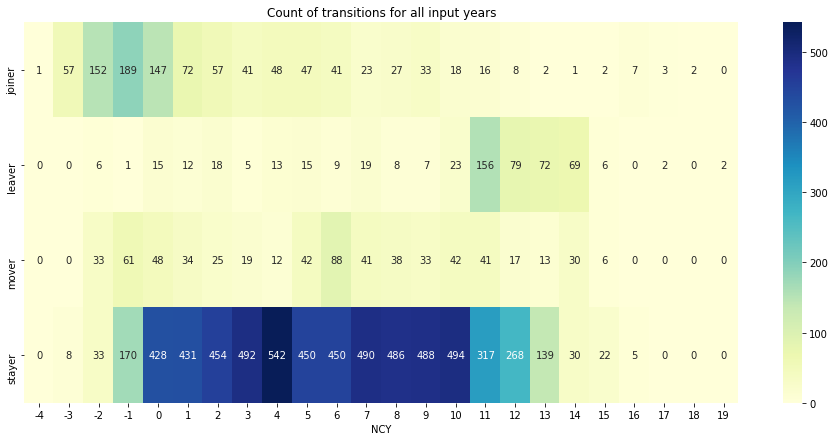

In [7]:
fig, ax = hm.transition_counts(transitions_csv)

In [8]:
hm.mover_dirichlet_v2(results_dir)

interactive(children=(Dropdown(description='need', options=('T', 'U', 'V', 'W', 'X', 'Y'), value='T'), Dropdow…

In [9]:
hm.mover_dirichlet_v2_rollup(results_dir)

interactive(children=(Dropdown(description='need', options=('T', 'U', 'V', 'W', 'X', 'Y'), value='T'), Dropdow…

In [10]:
hm.mover_dirichlet(results_for_checking_dir)

interactive(children=(Dropdown(description='need', options=('T', 'U', 'V', 'W', 'X', 'Y'), value='T'), Dropdow…

# Chart Comparison

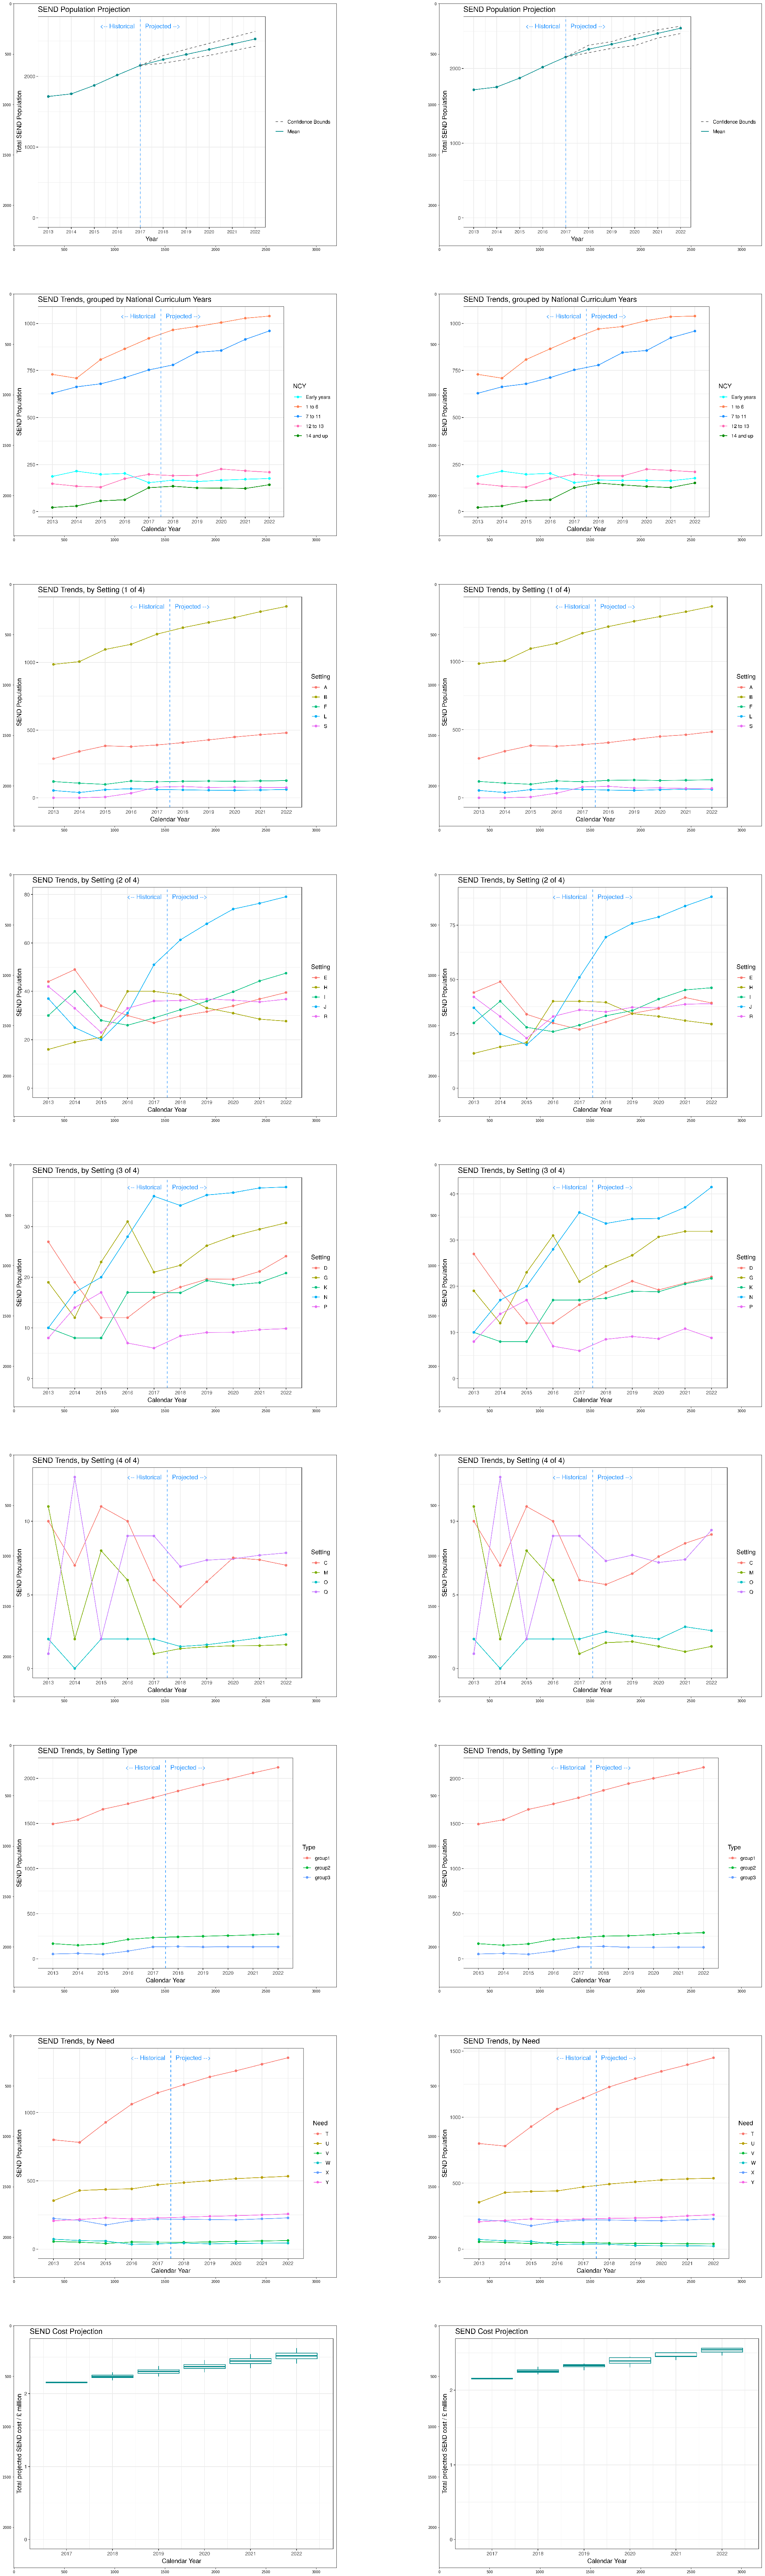

In [11]:
charts = ["Total_Population.png",
          "NCY_Population_Trends.png",
          "Settings_Trends_1.png",
          "Settings_Trends_2.png",
          "Settings_Trends_3.png",
          "Settings_Trends_4.png",
          "Setting_Type_Counts.png",
          "Need_Trends.png",
          "Total_Cost.png"]

fig, ax = plt.subplots(len(charts),2,figsize=(40, len(charts) * 15))

def imagerow(row, filename):
    ax[row,0].imshow(plt.imread(results_dir + filename))
    ax[row,1].imshow(plt.imread(results_for_checking_dir + filename))

for i, filename in enumerate(charts):
    imagerow(i, filename)
    

# Validation Comparison

Functions to work out validation differences

Quick note on validation:
 - three runs
 - 13/14 to predict 15,16,17 (n-transitions 1)
 - 13/14/15 to predict 16/17 (n-transitions 2)
 - 13/14/15/16 to predict 17 (n-transitions 3)
 
 

In [12]:
def analyse_validation(index_cols):
    def fn(path,title):
        df = pd.read_csv(path)
        df = df.set_index(index_cols)
        df = df[['ground-truth','mean']]
        df['diff'] = df['mean'] - df['ground-truth']
        df['fdiff'] = round(df['mean']/df['ground-truth'],3)
        df['fdiff'] = df['fdiff'].fillna(0)
        df.columns = pd.MultiIndex.from_product([[title],df.columns])
        return df
    return fn
    
analyse_count_validation = analyse_validation(['calendar-year', 'n-transition'])
analyse_state_validation = analyse_validation(['calendar-year', 'n-transitions', 'academic-year', 'need-setting'])

### Count Per Calendar Year Differences

In [13]:
results_count = analyse_count_validation(results_dir + "/validation_results_count.csv", "results")
results_for_checking_count = analyse_count_validation(results_for_checking_dir + "/validation_results_count.csv", "results_for_checking")
validation_count = pd.concat([results_for_checking_count, results_count], axis=1)
validation_count

results_for_checking                        \
                                   ground-truth    mean   diff  fdiff   
calendar-year n-transition                                              
2015          1                            1877  1834.1  -42.9  0.977   
2016          1                            2003  1885.8 -117.2  0.941   
2017          1                            2153  1972.5 -180.5  0.916   
2016          2                            2003  1995.4   -7.6  0.996   
2017          2                            2153  2111.6  -41.4  0.981   
              3                            2153  2111.8  -41.2  0.981   

                                results                          
                           ground-truth     mean    diff  fdiff  
calendar-year n-transition                                       
2015          1                    1877  1845.01  -31.99  0.983  
2016          1                    2003  1893.93 -109.07  0.946  
2017          1                    2153  1979.99 -173.01  0.920  
2016          2                    2003  2004.37    1.37  1.001  
2017          2                    2153  2102.75  -50.25  0.977  
              3                    2153  2107.38  -45.62  0.979

Are all results below a perentage threshold difference?

In [14]:
pdiff_threshold = 1 # percentage difference between validation
validation_count[100 * (validation_count['results_for_checking','fdiff'] - validation_count['results','fdiff']).abs() > pdiff_threshold].empty

True

note: this may be a better check than the current md5sum based acceptance test in the model

### State Differences

In [15]:
results_state = analyse_state_validation(results_dir + "/validation_results_state.csv", "results")
results_for_checking_state = analyse_state_validation(results_for_checking_dir + "/validation_results_state.csv", "results_for_checking")
validation_state = pd.concat([results_for_checking_state, results_state], axis=1)
validation_state.head(10)

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2015          1             0             T-K                             0   
                            11            Y-F                             0   
                            4             V-H                             0   
                            8             Y-R                             0   
                            15            U-E                             0   
                            3             W-E                             0   
                            9             U-C                             0   
                            11            V-I                             1   
                            0             V-O                             0   
                            10            V-L                             0   

                                                                            \
                                                       mean diff     fdiff   
calendar-year n-transitions academic-year need-setting                       
2015          1             0             T-K           1.3  1.3       inf   
                            11            Y-F           0.0  0.0  0.000000   
                            4             V-H           0.0  0.0  0.000000   
                            8             Y-R           0.0  0.0  0.000000   
                            15            U-E           0.0  0.0  0.000000   
                            3             W-E           0.0  0.0  0.000000   
                            9             U-C           0.0  0.0  0.000000   
                            11            V-I           1.9  0.9  1.900000   
                            0             V-O           0.0  0.0  0.000000   
                            10            V-L           0.0  0.0  0.000000   

                                                            results        \
                                                       ground-truth  mean   
calendar-year n-transitions academic-year need-setting                      
2015          1             0             T-K                     0  0.96   
                            11            Y-F                     0  0.09   
                            4             V-H                     0  0.03   
                            8             Y-R                     0  0.01   
                            15            U-E                     0  0.00   
                            3             W-E                     0  0.15   
                            9             U-C                     0  0.01   
                            11            V-I                     1  1.84   
                            0             V-O                     0  0.02   
                            10            V-L                     0  0.01   

                                                                        
                                                        diff     fdiff  
calendar-year n-transitions academic-year need-setting                  
2015          1             0             T-K           0.96       inf  
                            11            Y-F           0.09       inf  
                            4             V-H           0.03       inf  
                            8             Y-R           0.01       inf  
                            15            U-E           0.00  0.000000  
                            3             W-E           0.15       inf  
                            9             U-C           0.01       inf  
                            11            V-I           0.84  1.840000  
                            0             V-O           0.02       inf  
                            10            V-L           0.01       inf

In [16]:
pdiff_threshold = 1 # percentage difference between validation
diff_threshold = 5 # population difference between validation

percentage_mask = 100 * (validation_state['results_for_checking','fdiff'] - validation_state['results','fdiff']).abs() > pdiff_threshold
diff_mask = (validation_state['results_for_checking', 'diff'] - validation_state['results','diff']).abs() > diff_threshold
validation_state[percentage_mask & diff_mask].empty

False

#### Which States are >5 pop difference and > 1% different?

In [17]:
validation_state[percentage_mask & diff_mask]

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2015          1             1             T-B                            76   
2016          1             1             T-B                            68   
2017          1             2             T-B                            53   
2016          2             0             T-B                            49   
                            1             T-B                            68   
2017          2             2             T-B                            53   

                                                                           \
                                                        mean  diff  fdiff   
calendar-year n-transitions academic-year need-setting                      
2015          1             1             T-B           61.0 -15.0  0.803   
2016          1             1             T-B           44.7 -23.3  0.657   
2017          1             2             T-B           53.9   0.9  1.017   
2016          2             0             T-B           50.8   1.8  1.037   
                            1             T-B           80.6  12.6  1.185   
2017          2             2             T-B           86.0  33.0  1.623   

                                                            results         \
                                                       ground-truth   mean   
calendar-year n-transitions academic-year need-setting                       
2015          1             1             T-B                    76  55.82   
2016          1             1             T-B                    68  54.46   
2017          1             2             T-B                    53  61.76   
2016          2             0             T-B                    49  56.17   
                            1             T-B                    68  75.10   
2017          2             2             T-B                    53  79.70   

                                                                      
                                                         diff  fdiff  
calendar-year n-transitions academic-year need-setting                
2015          1             1             T-B          -20.18  0.734  
2016          1             1             T-B          -13.54  0.801  
2017          1             2             T-B            8.76  1.165  
2016          2             0             T-B            7.17  1.146  
                            1             T-B            7.10  1.104  
2017          2             2             T-B           26.70  1.504

What percentage are different by this much?

In [18]:
100 * validation_state[percentage_mask & diff_mask].shape[0]/validation_state.shape[0]

0.06830601092896176

What percentage is the model better than or equal to the current results?

In [19]:
better_fdiff_mask = ((1 - validation_state['results_for_checking', 'fdiff']).abs() >= (1 - validation_state['results','fdiff']).abs())
100 * validation_state[better_fdiff_mask].shape[0] / validation_state.shape[0]

52.81193078324226

In [20]:
validation_state[~better_fdiff_mask].head(10)

results_for_checking  \
                                                               ground-truth   
calendar-year n-transitions academic-year need-setting                        
2015          1             11            Y-F                             0   
                            4             V-H                             0   
                            8             Y-R                             0   
                            3             W-E                             0   
                            9             U-C                             0   
                            0             V-O                             0   
                            10            V-L                             0   
                                          U-N                             0   
                            7             W-K                             0   
                            9             T-M                             0   

                                                                        \
                                                       mean diff fdiff   
calendar-year n-transitions academic-year need-setting                   
2015          1             11            Y-F           0.0  0.0   0.0   
                            4             V-H           0.0  0.0   0.0   
                            8             Y-R           0.0  0.0   0.0   
                            3             W-E           0.0  0.0   0.0   
                            9             U-C           0.0  0.0   0.0   
                            0             V-O           0.0  0.0   0.0   
                            10            V-L           0.0  0.0   0.0   
                                          U-N           0.0  0.0   0.0   
                            7             W-K           0.0  0.0   0.0   
                            9             T-M           0.0  0.0   0.0   

                                                            results        \
                                                       ground-truth  mean   
calendar-year n-transitions academic-year need-setting                      
2015          1             11            Y-F                     0  0.09   
                            4             V-H                     0  0.03   
                            8             Y-R                     0  0.01   
                            3             W-E                     0  0.15   
                            9             U-C                     0  0.01   
                            0             V-O                     0  0.02   
                            10            V-L                     0  0.01   
                                          U-N                     0  0.01   
                            7             W-K                     0  0.02   
                            9             T-M                     0  0.01   

                                                                    
                                                        diff fdiff  
calendar-year n-transitions academic-year need-setting              
2015          1             11            Y-F           0.09   inf  
                            4             V-H           0.03   inf  
                            8             Y-R           0.01   inf  
                            3             W-E           0.15   inf  
                            9             U-C           0.01   inf  
                            0             V-O           0.02   inf  
                            10            V-L           0.01   inf  
                                          U-N           0.01   inf  
                            7             W-K           0.02   inf  
                            9             T-M           0.01   inf

We've introduced movements that now have priors which result in a non-zero result compared to the ground-truth.

In [21]:
inf_fdiff_mask = (validation_state["results", "fdiff"] == np.inf) & (validation_state["results_for_checking", "mean"] == 0)
new_means = validation_state[inf_fdiff_mask]
new_means.shape[0]

3250

In [22]:
new_means['results', 'mean'].max()

0.96

In [23]:
100 * validation_state[inf_fdiff_mask].shape[0] / validation_state.shape[0]

36.99908925318761

In 37% of cases we've introduced an fdiff of infinity ie. where the ground truth is zero there now is a predicted value greater than zero.  Of these 3250 cases the introduced pouplation addition is never more than 0.96 pupils i.e, always < 1 person.

In [24]:
100 * validation_state[better_fdiff_mask & ~inf_fdiff_mask].shape[0] / validation_state[~inf_fdiff_mask].shape[0]

83.82724972894832

Where we have *not* introduced an infinite fdiff the model is closer to ground-truth in 83% of the cases.

# Conclusions



With little or no observations the distributions over movement between need and setting is significantly impacted.  However this is mitigated almost entirely by the fact that these same settings/need combinations nearly always have zero population.

The mover dirichlet calculation is now based off of valid settings leading to the removal of columns previously calculated that arguably shouldn't have been.  This means that the lookup from this datastructure can now be used to determine if we should add the population to a state.